In [1]:
import sys
sys.path.append(r'../script/')
from protein_composition import *
import pandas as pd
import numpy as np
import re
import os
import  matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats

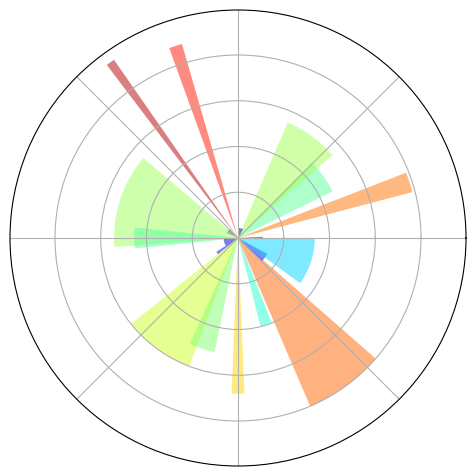

In [6]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
# savefig('../figures/polar_ex.png',dpi=48)
plt.show()

In [2]:
strain1='Pseudomonas'
strain2='Corynebacterium_RNA_seq'
strain3='BW25113'
strain4='Bacillus'
strain5='Yeast_single_cell'

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain1
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino1=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain2
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino2=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain3
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino3=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)
    
amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain4
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino4=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

amino_composition_norm_onecell_df_outfile='../analysis_result/amino_composition_proteome_by_condition_%s.csv'%strain5
amino_composition_norm_onecell_df=pd.read_csv(amino_composition_norm_onecell_df_outfile,index_col=0)
twoamino5=amino_composition_norm_onecell_df.sort_index(axis = 1,ascending = True)

twoamino_use_data={}
for eachamino in list(twoamino1.columns):
    twoamino_use_data[eachamino]=[]
    twoamino_use_data[eachamino].append(list(twoamino1[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino2[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino3[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino4[eachamino]))
    twoamino_use_data[eachamino].append(list(twoamino5[eachamino]))    

In [5]:
twoamino_use_data1 = pd.DataFrame(twoamino1)
twoamino_use_data1['species'] = 'Pseudomonas'

twoamino_use_data2 = pd.DataFrame(twoamino2)
twoamino_use_data2['species'] = 'Corynebacterium_RNA_seq'

twoamino_use_data3 = pd.DataFrame(twoamino3)
twoamino_use_data3['species'] = 'BW25113'

twoamino_use_data4 = pd.DataFrame(twoamino4)
twoamino_use_data4['species'] = 'Bacillus'

twoamino_use_data5 = pd.DataFrame(twoamino5)
twoamino_use_data5['species'] = 'Yeast_single_cell'
twoamino_use_data = pd.concat([twoamino_use_data1,twoamino_use_data2,twoamino_use_data3,twoamino_use_data4,twoamino_use_data5],  ignore_index = True)
twoamino_use_data.to_csv('./data.csv',index=None)

In [4]:
twoamino_use_data

Ala       Arg       Asn       Asp       Cys       Gln       Glu  \
0     0.080814  0.102639  0.027757  0.056116  0.009391  0.048905  0.071237   
1     0.080787  0.102517  0.027791  0.056141  0.009408  0.048905  0.071304   
2     0.080710  0.102537  0.027821  0.056224  0.009378  0.048954  0.071316   
3     0.081034  0.103075  0.027706  0.056075  0.009519  0.048953  0.070971   
4     0.081021  0.103090  0.027733  0.056051  0.009535  0.048951  0.070989   
...        ...       ...       ...       ...       ...       ...       ...   
2025  0.052819  0.064330  0.051644  0.057582  0.009307  0.041453  0.075145   
2026  0.052682  0.061682  0.052033  0.058561  0.009556  0.042253  0.074582   
2027  0.052003  0.062667  0.051902  0.058673  0.009502  0.042475  0.076106   
2028  0.050252  0.061930  0.053023  0.059468  0.009839  0.041471  0.077300   
2029  0.052474  0.063086  0.051559  0.058784  0.009538  0.041638  0.076226   

           Gly       His       Iie  ...       Lys       Met       Phe  \
0     0.049327  0.026390  0.043561  ...  0.034777  0.024412  0.045769   
1     0.049270  0.026463  0.043559  ...  0.034882  0.024393  0.045697   
2     0.049170  0.026443  0.043663  ...  0.034905  0.024418  0.045717   
3     0.049379  0.026615  0.043196  ...  0.034132  0.024273  0.045695   
4     0.049410  0.026641  0.043206  ...  0.034173  0.024304  0.045686   
...        ...       ...       ...  ...       ...       ...       ...   
2025  0.035878  0.023784  0.061606  ...  0.089466  0.023202  0.051743   
2026  0.036002  0.023640  0.061915  ...  0.088575  0.023216  0.051154   
2027  0.035361  0.023660  0.061808  ...  0.089350  0.023448  0.051664   
2028  0.034613  0.023822  0.062395  ...  0.088223  0.023481  0.052559   
2029  0.036049  0.023731  0.061753  ...  0.089930  0.023305  0.051449   

           Pro       Ser       Thr       Trp       Tyr       Val  \
0     0.045586  0.045196  0.039259  0.023201  0.035976  0.063556   
1     0.045569  0.045156  0.039276  0.023173  0.035957  0.063494   
2     0.045493  0.045203  0.039293  0.023126  0.035952  0.063521   
3     0.045783  0.045255  0.039179  0.023465  0.035960  0.063370   
4     0.045747  0.045251  0.039174  0.023493  0.035951  0.063376   
...        ...       ...       ...       ...       ...       ...   
2025  0.037297  0.060544  0.054087  0.014780  0.044456  0.062043   
2026  0.037494  0.061973  0.055859  0.014997  0.044760  0.061026   
2027  0.037322  0.061661  0.053832  0.014965  0.044242  0.060726   
2028  0.037417  0.062367  0.053637  0.015250  0.044092  0.059535   
2029  0.037299  0.060637  0.053769  0.015134  0.044335  0.061650   

                species  
0           Pseudomonas  
1           Pseudomonas  
2           Pseudomonas  
3           Pseudomonas  
4           Pseudomonas  
...                 ...  
2025  Yeast_single_cell  
2026  Yeast_single_cell  
2027  Yeast_single_cell  
2028  Yeast_single_cell  
2029  Yeast_single_cell  

[2030 rows x 21 columns]

In [16]:
twoamino2

Ala       Arg       Asn       Asp       Cys       Gln  \
ERR1799216  0.075327  0.076830  0.034847  0.063347  0.006157  0.038685   
ERR1799217  0.075497  0.076856  0.034792  0.063399  0.006145  0.038759   
ERR1799218  0.075298  0.076813  0.034839  0.063359  0.006150  0.038707   
ERR1799219  0.075454  0.076798  0.034803  0.063359  0.006122  0.038714   
ERR2401409  0.075356  0.076861  0.034726  0.063160  0.006231  0.038843   
...              ...       ...       ...       ...       ...       ...   
SRR8170164  0.075369  0.076747  0.034778  0.063173  0.006159  0.038658   
SRR8170165  0.075329  0.076823  0.034763  0.063127  0.006158  0.038655   
SRR826828   0.075163  0.076573  0.034686  0.062913  0.006274  0.038927   
SRR826829   0.075224  0.076550  0.034773  0.062874  0.006256  0.038901   
SRR9841648  0.076373  0.076956  0.034248  0.063081  0.006062  0.038266   

                 Glu       Gly       His       Iie       Leu       Lys  \
ERR1799216  0.076183  0.048008  0.025094  0.059567  0.098468  0.041760   
ERR1799217  0.076130  0.048022  0.025181  0.059501  0.098462  0.041739   
ERR1799218  0.076250  0.047983  0.025146  0.059580  0.098414  0.041804   
ERR1799219  0.076211  0.048031  0.025108  0.059540  0.098451  0.041709   
ERR2401409  0.075820  0.047900  0.025195  0.059647  0.098781  0.041541   
...              ...       ...       ...       ...       ...       ...   
SRR8170164  0.075959  0.048009  0.025156  0.059724  0.098668  0.041602   
SRR8170165  0.075970  0.047980  0.025199  0.059727  0.098719  0.041634   
SRR826828   0.075739  0.047855  0.025228  0.059796  0.098828  0.041759   
SRR826829   0.075510  0.047785  0.025241  0.059880  0.098810  0.041665   
SRR9841648  0.076418  0.048705  0.024953  0.059613  0.099062  0.041087   

                 Met       Phe       Pro       Ser       Thr       Trp  \
ERR1799216  0.027188  0.046944  0.043518  0.052193  0.057383  0.022198   
ERR1799217  0.027232  0.046873  0.043559  0.052189  0.057398  0.022148   
ERR1799218  0.027182  0.046971  0.043563  0.052198  0.057400  0.022187   
ERR1799219  0.027221  0.046886  0.043552  0.052214  0.057464  0.022180   
ERR2401409  0.027201  0.047003  0.043619  0.052369  0.057448  0.022290   
...              ...       ...       ...       ...       ...       ...   
SRR8170164  0.027216  0.046995  0.043550  0.052252  0.057514  0.022293   
SRR8170165  0.027223  0.046996  0.043555  0.052227  0.057462  0.022359   
SRR826828   0.027294  0.047197  0.043486  0.052636  0.057486  0.022287   
SRR826829   0.027313  0.047257  0.043523  0.052680  0.057561  0.022298   
SRR9841648  0.027267  0.046663  0.043631  0.051976  0.057419  0.022155   

                 Tyr       Val  
ERR1799216  0.032108  0.074123  
ERR1799217  0.032057  0.074145  
ERR1799218  0.032131  0.074030  
ERR1799219  0.032103  0.074115  
ERR2401409  0.032043  0.074007  
...              ...       ...  
SRR8170164  0.032130  0.074040  
SRR8170165  0.032051  0.074055  
SRR826828   0.032000  0.073872  
SRR826829   0.031977  0.073907  
SRR9841648  0.031343  0.074663  

[292 rows x 20 columns]

In [14]:
twoamino_use_data

{'Ala': [[0.080814,
   0.080787,
   0.08071,
   0.081034,
   0.081021,
   0.080703,
   0.080622,
   0.080714,
   0.080698,
   0.080679,
   0.080679,
   0.081023,
   0.08103,
   0.080747,
   0.08089,
   0.081004,
   0.08091,
   0.080724,
   0.0807759999999999,
   0.08087,
   0.080604,
   0.080887,
   0.08069,
   0.080763,
   0.080701,
   0.0808869999999999,
   0.080745,
   0.080899,
   0.080691,
   0.080703,
   0.080672,
   0.080742,
   0.080852,
   0.080735,
   0.080828,
   0.080765,
   0.080804,
   0.080758,
   0.08086,
   0.080821,
   0.08084,
   0.080806,
   0.081457,
   0.0814999999999999,
   0.0814459999999999,
   0.081429,
   0.081376,
   0.081328,
   0.080716,
   0.080771,
   0.080685,
   0.080696,
   0.080711,
   0.080701,
   0.080983,
   0.0810309999999999,
   0.0810819999999999,
   0.080895,
   0.080627,
   0.080652,
   0.080638,
   0.080668,
   0.080667,
   0.080657,
   0.0807659999999999,
   0.080678,
   0.080746,
   0.080733,
   0.080632,
   0.080602,
   0.080577,
   0.080

In [11]:
data=[]
for eachkey in twoamino_use_data.keys():
    data.append(twoamino_use_data[eachkey])
labels = ["P. aeruginosa",'C. glutamicum',"B. subtilis",'E. coli', "S. cerevisiae"]
colors = ['blue', 'red', 'green','darkorange','violet']
fold=4.5
ori_list=[1,2,3,4,5]
positions=[ori_list,list(np.add(ori_list,1.5*fold)),list(np.add(ori_list,3*fold)),list(np.add(ori_list,4.5*fold)),list(np.add(ori_list,6*fold)),list(np.add(ori_list,7.5*fold)),list(np.add(ori_list,9*fold)),
           list(np.add(ori_list,10.5*fold)),list(np.add(ori_list,12*fold)),list(np.add(ori_list,13.5*fold)),list(np.add(ori_list,15*fold)),list(np.add(ori_list,16.5*fold)),list(np.add(ori_list,18*fold)),
           list(np.add(ori_list,19.5*fold)),list(np.add(ori_list,21*fold)),list(np.add(ori_list,22.5*fold)),list(np.add(ori_list,24*fold)),list(np.add(ori_list,25.5*fold)),list(np.add(ori_list,27*fold)),list(np.add(ori_list,28.5*fold))]

x_position_list=[]
for eachp in positions:
    x_position_list.append(np.mean(eachp))
x_position=x_position_list
x_position_fmt=list(twoamino1.columns)
ylabel='Mass ratio (g/g total protein)'
pngname='../analysis_result/article_figures/twenty_amino_boxplot_comparison_otherspecies.png'
# draw_box_vert(data,labels,colors,positions,x_position,x_position_fmt,ylabel,pngname,15,30)

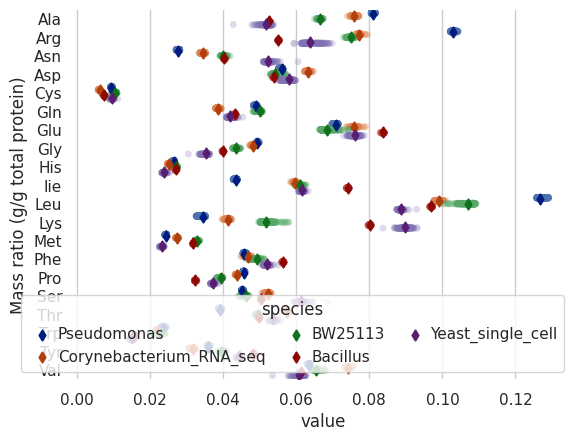

In [27]:
sns.set_theme(style="whitegrid")
# iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
data = pd.melt(twoamino_use_data, "species", var_name="Mass ratio (g/g total protein)")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=data, x="value", y="Mass ratio (g/g total protein)", hue="species",
    dodge=True, alpha=.25, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=data, x="value", y="Mass ratio (g/g total protein)", hue="species",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)
plt.savefig('./output.png',dpi =300,bbox_inches='tight') 

In [12]:
data

[[[0.080814,
   0.080787,
   0.08071,
   0.081034,
   0.081021,
   0.080703,
   0.080622,
   0.080714,
   0.080698,
   0.080679,
   0.080679,
   0.081023,
   0.08103,
   0.080747,
   0.08089,
   0.081004,
   0.08091,
   0.080724,
   0.0807759999999999,
   0.08087,
   0.080604,
   0.080887,
   0.08069,
   0.080763,
   0.080701,
   0.0808869999999999,
   0.080745,
   0.080899,
   0.080691,
   0.080703,
   0.080672,
   0.080742,
   0.080852,
   0.080735,
   0.080828,
   0.080765,
   0.080804,
   0.080758,
   0.08086,
   0.080821,
   0.08084,
   0.080806,
   0.081457,
   0.0814999999999999,
   0.0814459999999999,
   0.081429,
   0.081376,
   0.081328,
   0.080716,
   0.080771,
   0.080685,
   0.080696,
   0.080711,
   0.080701,
   0.080983,
   0.0810309999999999,
   0.0810819999999999,
   0.080895,
   0.080627,
   0.080652,
   0.080638,
   0.080668,
   0.080667,
   0.080657,
   0.0807659999999999,
   0.080678,
   0.080746,
   0.080733,
   0.080632,
   0.080602,
   0.080577,
   0.080594,
  